# **Homework 2-Steam Reviews 2021**
## **Research Questions**

### [RQ1] Exploratory data analysis


---
### [RQ2]

In [ ]:
!pip3 install --upgrade pip
!pip install kaggle

In [ ]:
!kaggle datasets download -d najzeko/steam-reviews-2021

In [ ]:
!unzip steam-reviews-2021.zip

In [ ]:
!pip3 install matplotlib

<AxesSubplot:xlabel='app_name'>

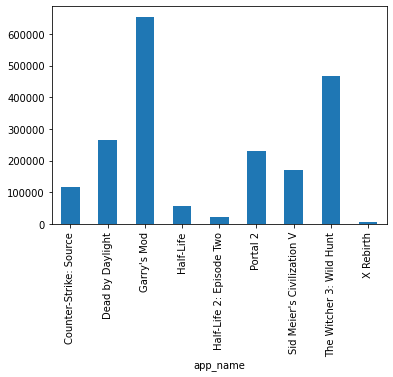

In [5]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
dataset = pd.read_csv('./steam_reviews.csv', header='infer', nrows=2000000)
dataset.groupby('app_name').review.count().plot.bar()
#I grouped by "app_name", selected review column, count the rewivew for the single app and eventually plot them 

In [15]:
maxScore = dataset.groupby('app_name').weighted_vote_score.mean()
topTen = maxScore.sort_values(ascending=False)
for i in range(5):
    print(topTen.index[i] , format(topTen[i],'.5f'))
#through weighted_vote_score I've done the mean. In the end I showed the 5 with the highest rating

X Rebirth 0.38045
Counter-Strike: Source 0.18269
Half-Life 2: Episode Two 0.17264
Half-Life 0.16240
Dead by Daylight 0.16131


In [34]:
#I grouped by "app_name", I've select just the column with recommended equal to true, selected recommended column, count 
min = dataset[dataset['recommended'] == True].groupby('app_name').recommended.count()
max = dataset[dataset['recommended'] == True].groupby('app_name').recommended.count()
print("the application with more recommendations is: ", df.idxmax(), "with",df.loc[df.idxmax()])
print("the application with fewer recommendations is: ", df.idxmin(), "with",df.loc[df.idxmin()])

the application with more recommendations is:  The Witcher 3: Wild Hunt whit 468691
the application with fewer recommendations is:  X Rebirth whit 7001


In [104]:
purchase = dataset[dataset['steam_purchase'] == True].groupby('app_name').steam_purchase.value_counts()
purchase_free = dataset[dataset['received_for_free'] == True].groupby('app_name').received_for_free.value_counts()
print("List of those that have been purchased")
for i in range(len(purchase)):
    print(purchase.index[i][0], ":", purchase[i])
print("\nList of those that have been received for free")
for i in range(len(purchase)):
    print(purchase_free.index[i][0], ":", purchase_free[i])


List of those that have been purchased
Counter-Strike: Source : 74817
Garry's Mod : 81956
Half-Life : 43875
Half-Life 2: Episode Two : 17538
Portal 2 : 182952
The Witcher 3: Wild Hunt : 429409
X Rebirth : 4934

List of those that have been received for free
Counter-Strike: Source : 5082
Garry's Mod : 4626
Half-Life : 2799
Half-Life 2: Episode Two : 897
Portal 2 : 5779
The Witcher 3: Wild Hunt : 5748
X Rebirth : 35


---
### [RQ3]

In [122]:
import pandas as pd

In [123]:
# We will use the parser seen during lectures 
def dateparse(time_in_secs):
    return pd.to_datetime(time_in_secs, unit='s')

In [124]:
steam_small = pd.read_csv('C:/Users/Filippo/Desktop/università/ADM/steam_reviews.csv',header='infer',parse_dates=['timestamp_created','timestamp_updated', 'author.last_played'],date_parser=dateparse)

In [125]:
# With a simple query we isolate the feature we need, excluding the date part and with value_counts() we group the creation variable
creation = steam_small.timestamp_created.dt.time
print("Most common time of writing:",creation.value_counts().index[0],"\nNumber of occurrences:", creation.value_counts()[0])

most common time of writing: 15:54:53 
number of occurrences: 583


In [126]:
def rev_counts(time_intervals):
    # First we ccreate the variable of interest
    hours = steam_small.timestamp_created.dt.hour
    # Then a long procedure to engineer the input: parse, extract hours and sort. At last we append 24 to include reviews written between 8 pm and 12 pm
    time_intervals = pd.Series(time_intervals)
    time_intervals = pd.to_datetime(time_intervals,infer_datetime_format=True)
    time_intervals = time_intervals.dt.hour
    time_intervals = sorted(time_intervals)
    time_intervals.append(24)
    # We then bin the variable of interest with the newly created bins, group the results and plot 
    bins = pd.cut(hours,time_intervals)
    return bins.value_counts(sort=False).plot(kind='bar',title='Number of reviews by time interval',colormap='plasma',grid=True,rot=45)
    

<AxesSubplot:title={'center':'Number of reviews by time interval'}>

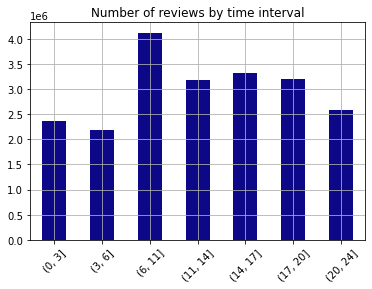

In [127]:
times = ['06:00:00','11:00:00','14:00:00','17:00:00','20:00:00','00:00:00','03:00:00']
rev_counts(times)

---
### [RQ4]

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('steam_reviews.csv', header='infer',usecols = ['language', 'votes_funny', 'votes_helpful'])

In [3]:
top_language_n = 3
top_language = dataset.loc[:,'language'].value_counts()
[:top_language_n].sort_values(ascending=False)
print(*top_language.index.array)

english schinese russian


In [4]:
def language_fillter(dataset, languages):
    cmlg = pd.DataFrame(columns=dataset.columns.values) 
    for lg in languages:
        cmlg = cmlg.append(dataset[dataset.language == lg])
    return cmlg
        

In [5]:
tr = language_fillter(dataset, top_language.index.array)
result = tr[tr.votes_funny > 0]
print((len(result)/len(tr))*100)

12.208323618618321


In [6]:
result = tr[tr.votes_helpful > 0]
print((len(result)/len(tr))*100)

29.162723635279374


---
### [RQ5]

In [6]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
dataset = pd.read_csv('./steam_reviews.csv', header='infer', nrows=2000000)
df = dataset.groupby('author.steamid')['author.num_reviews'].sum() 
df.sort_values(ascending=False).head(10)

author.steamid
76561197974092119    24206
76561198116879965    23975
76561198125392509    20944
76561197960373660    20685
76561198045381877    16624
76561198094803808    15752
76561198030784015    13891
76561198118629775    13738
76561198013146396    11489
76561198191189787    11027
Name: author.num_reviews, dtype: int64

In [7]:
mostPopularAuthor = df.sort_values(ascending=False).head(10).idxmax()
pd.set_option('display.max_rows', None)
dataset[dataset['author.steamid'] == mostPopularAuthor].app_name.head()
#the first line si the id

468155    The Witcher 3: Wild Hunt
522006                   Half-Life
574858      Counter-Strike: Source
655868    Half-Life 2: Episode Two
896474                    Portal 2
Name: app_name, dtype: object

In [159]:
countNumber = dataset[(dataset['author.steamid'] == mostPopularAuthor)].steam_purchase.value_counts()
perctNumber = dataset[(dataset['author.steamid'] == mostPopularAuthor)].steam_purchase.value_counts(normalize=True) * 100
if(True in countNumber):
    countNumber = countNumber.loc[countNumber.index == True].item()
    perctNumber = perctNumber.loc[perctNumber.index == True].item()
else:
    countNumber = 0
    perctNumber = 0
print('number of applications purchased : ', countNumber , 'in percentage', format(perctNumber, '.2f') , '%')

countNumber = dataset[(dataset['author.steamid'] == mostPopularAuthor)].received_for_free.value_counts()
perctNumber = dataset[(dataset['author.steamid'] == mostPopularAuthor)].received_for_free.value_counts(normalize=True) * 100
if(True in countNumber):
    countNumber = countNumber.loc[countNumber.index == True].item()
    perctNumber = perctNumber.loc[perctNumber.index == True].item()
else:
    countNumber = 0
    perctNumber = 0
print('number of applications purchased for free: ', countNumber , 'in percentage', format(perctNumber, '.2f') , '%')



number of applications purchased :  0 in percentage 0.00 %
number of applications purchased for free:  2 in percentage 28.57 %


In [233]:
reviewNumber = dataset[(dataset['author.steamid'] == 76561198030784015 ) & (dataset['steam_purchase']==False)].recommended.value_counts()
if(True in reviewNumber.loc[reviewNumber.index == True]):
    positive = reviewNumber.loc[reviewNumber.index == True].item()
else:
    positive = 0
if(False in reviewNumber.loc[reviewNumber.index == False]):
    negative = reviewNumber.loc[reviewNumber.index == False].item()
else:
    negative = 0

print('of the applications purchased', positive ,'was/were positively reviewed \n')
print('of the applications purchased', negative ,'was/were negatively reviewed')

of the applications purchased 1 was/were positively reviewed 

of the applications purchased 2 was/were negatively reviewed


---
### [RQ6]

In [30]:
import pandas as pd

In [31]:
# We will use the parser seen during lectures 
def dateparse(time_in_secs):
    return pd.to_datetime(time_in_secs, unit='s')

In [32]:
dataset = pd.read_csv('steam_reviews.csv', header='infer',usecols = ['timestamp_created', 'timestamp_updated', 'author.steamid'])

In [33]:
dataset['avg'] = dateparse(dataset['timestamp_updated']) - dateparse(dataset['timestamp_created'])
print(dataset['avg'].mean())

36 days 03:33:10.465411


In [35]:
top_language_n = 3
top_language = dataset.loc[:,'author.steamid'].value_counts()
top_language = top_language[:3].sort_values(ascending=False)
print(*top_language.index.array)

76561198062813911 76561198315585536 76561198192166873


---
### [RQ7]

In [36]:
import pandas as pd
dataset = pd.read_csv('D:/ADM/steam_reviews.csv', header='infer')

In [37]:
# We just query the results and sum the boolean values.
print("The probability is equal to:",sum(dataset.weighted_vote_score >= 0.5) / len(dataset.weighted_vote_score))


The probability is equal to: 0.21998484322541792


---
So the probability of the event "a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5" given that it is a conditioned prob is equal to: 
> $P(Exists  funny | wvs > 0.5)=\frac{P(Exists  funny, wvs > 0.5)}{P(wvs > 0.5)}$ 

where wvs is weighted_vote_score


In [38]:
# P(wvs > 0.5)
P_denom = sum(dataset.weighted_vote_score > 0.5) / len(dataset.weighted_vote_score)

# P(Exists funny, wvs > 0.5)
tmp = dataset[dataset['weighted_vote_score'] > 0.5]
event = sum(tmp.votes_funny > 0)
P_num = event / len(dataset)
# Then we compute P(Exist funny | wvs > 0.5)
print("Probability that a review that has a wvs bigger than 0.5 has also at least one vote as funny:", P_num/P_denom)

Probability that a review that has a wvs bigger than 0.5 has also at least one vote as funny: 0.24978288914523247


In order to look for independence between 2 events we need to compute the probability of the intersection of these events and if it's equal to the product of the probability of these events then we have independence.
> $P(A \cap B) = P(A)P(B)$

In [39]:
# as such we already did some of these calculations before
# P(wvs > 0.5) is  P_denom
# P(Exists funny, wvs > 0.5) is P_num
# we need P(Exists funny)
P_EF = sum(dataset.votes_funny > 0)/len(dataset)
print("Q: Are these events independent?\nA:",P_num==P_denom*P_EF)

Q: Are these events independent?
A: False


looks like they aren't :(

---
### [RQ8]

In order to test whether the values from the two groupings of the weighted vote score variable come from the same population when we group chinese and russian reviews we want to run a Mann-Whitney test between the two vectors. First we extract these datasets and then we proceed with the analysis thanks to the scipy library 

In [17]:
import pandas as pd
dataset = pd.read_csv('D:/ADM/steam_reviews.csv', header='infer')

In [18]:
# data extraction
Rus = dataset[dataset['language']=='russian']
Chi = dataset[dataset['language']=='schinese']

In [19]:
import scipy.stats

In [20]:
# we run the test and look whether the p-value is bigger than
output = scipy.stats.mannwhitneyu(Rus.weighted_vote_score,Chi.weighted_vote_score,alternative='two-sided')
print("p-value for the U test",output.pvalue)

p-value for the U test 0.0


As expected the two variables have a p-value below 0.05, so we reject the null hypothesis that the two samples come from the same population, for further discussion we will now plot the histograms of the two variables

In [21]:
import matplotlib.pyplot as plt

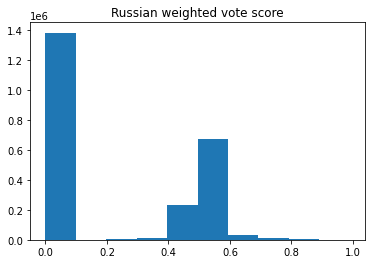

In [22]:
plt.hist(Rus.weighted_vote_score)
plt.title('Russian weighted vote score')
plt.show()

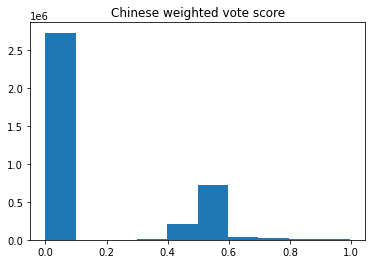

In [23]:
plt.hist(Chi.weighted_vote_score)
plt.title('Chinese weighted vote score')
plt.show()

Now, we want to see if there is a relationship between the variables weighted vote score and the time delta between the posting and updating of a review. To do so we look for a summary statistics as the correlation and then we might also try to fit a linear regression model to explain the wvs from the time delta.

In [24]:
# feature extraction
timedelta = dataset.timestamp_updated-dataset.timestamp_created
wvs = dataset.weighted_vote_score
# Correlation computation
cor = scipy.stats.pearsonr(wvs,timedelta)
print("Pearson's correlation coefficent is:",cor[0])

Pearson's correlation coefficent is: 0.07204700562301417


In [25]:
# This coefficient seems very low, we might want to try a linear model
from sklearn.linear_model import LinearRegression
import numpy as np

In [26]:
timedelta = np.array(timedelta)
wvs = np.array(wvs)
model = LinearRegression()
model.fit(timedelta.reshape(-1,1),wvs)
slope = model.coef_
intercept = model.intercept_ 
model.score(timedelta.reshape(-1,1),wvs)

0.0051907710192479195

The R squared for the regression model is very close to zero, signaling no definite relasionship between the two vectors, to further analyze this we plot the data with a scatterplot and add a red line for the regression.

In [27]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--',lw=3,color='red')

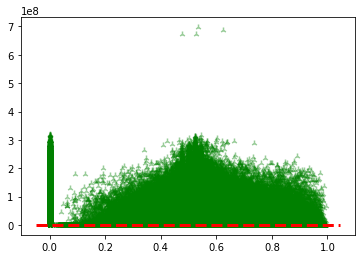

In [28]:
plt.scatter(wvs,timedelta, marker='2', cmap='plasma',alpha=0.4,color='green')
abline(slope,intercept)
plt.show()

As we can see the line does not fit the data at all and there is no identifiable pattern in the data.

To see if there is a substantial change when we divide the dataset in recommended and not recommended review we do the following

In [29]:
# sub-setting
recom = dataset[dataset['recommended']==True]
not_recom = dataset[dataset['recommended']!=True]

#### Recommended

In [30]:
# feature extraction
timedelta = recom.timestamp_updated-recom.timestamp_created
wvs = recom.weighted_vote_score
# Correlation computation
cor = scipy.stats.pearsonr(wvs,timedelta)
print("Pearson's correlation coefficent is:",cor[0])

Pearson's correlation coefficent is: 0.07948251790961866


In [31]:
# This coefficient seems very low, we might want to try a linear model
from sklearn.linear_model import LinearRegression
import numpy as np

In [32]:
timedelta = np.array(timedelta)
wvs = np.array(wvs)
model = LinearRegression()
model.fit(timedelta.reshape(-1,1),wvs)
slope = model.coef_
intercept = model.intercept_ 
model.score(timedelta.reshape(-1,1),wvs)

0.006317470653246393

#### Not Recommended

In [33]:
# feature extraction
timedelta = not_recom.timestamp_updated-not_recom.timestamp_created
wvs = not_recom.weighted_vote_score
# Correlation computation
cor = scipy.stats.pearsonr(wvs,timedelta)
print("Pearson's correlation coefficent is:",cor[0])

Pearson's correlation coefficent is: -0.0017771848851916225


In [34]:
# This coefficient seems very low, we might want to try a linear model
from sklearn.linear_model import LinearRegression
import numpy as np

In [35]:
timedelta = np.array(timedelta)
wvs = np.array(wvs)
model = LinearRegression()
model.fit(timedelta.reshape(-1,1),wvs)
slope = model.coef_
intercept = model.intercept_ 
model.score(timedelta.reshape(-1,1),wvs)

3.1583861150874526e-06

There appears to be not much difference between the results, the R squared is still very low even considering only recommended or not recommended reviews, so apparently there is no relationship between the variables.